In [1]:
print TN / float(TN + FP)import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = 'diabetes.csv'
df_diabetics = pd.read_csv(path)
df_diabetics_info = df_diabetics.info()
display(df_diabetics.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df_diabetics.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df_diabetics.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df_diabetics.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [6]:
df_diabetics.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df_diabetics_copy = df_diabetics.copy
df_diabetics_copy=df_diabetics_copy(deep = True)
df_diabetics_copy[['hypertension', 'blood_glucose_level', 'HbA1c_level', 'heart_disease', 'bmi']]= df_diabetics_copy[['hypertension', 'blood_glucose_level', 'HbA1c_level', 'heart_disease', 'bmi']]


In [8]:
df_diabetics.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

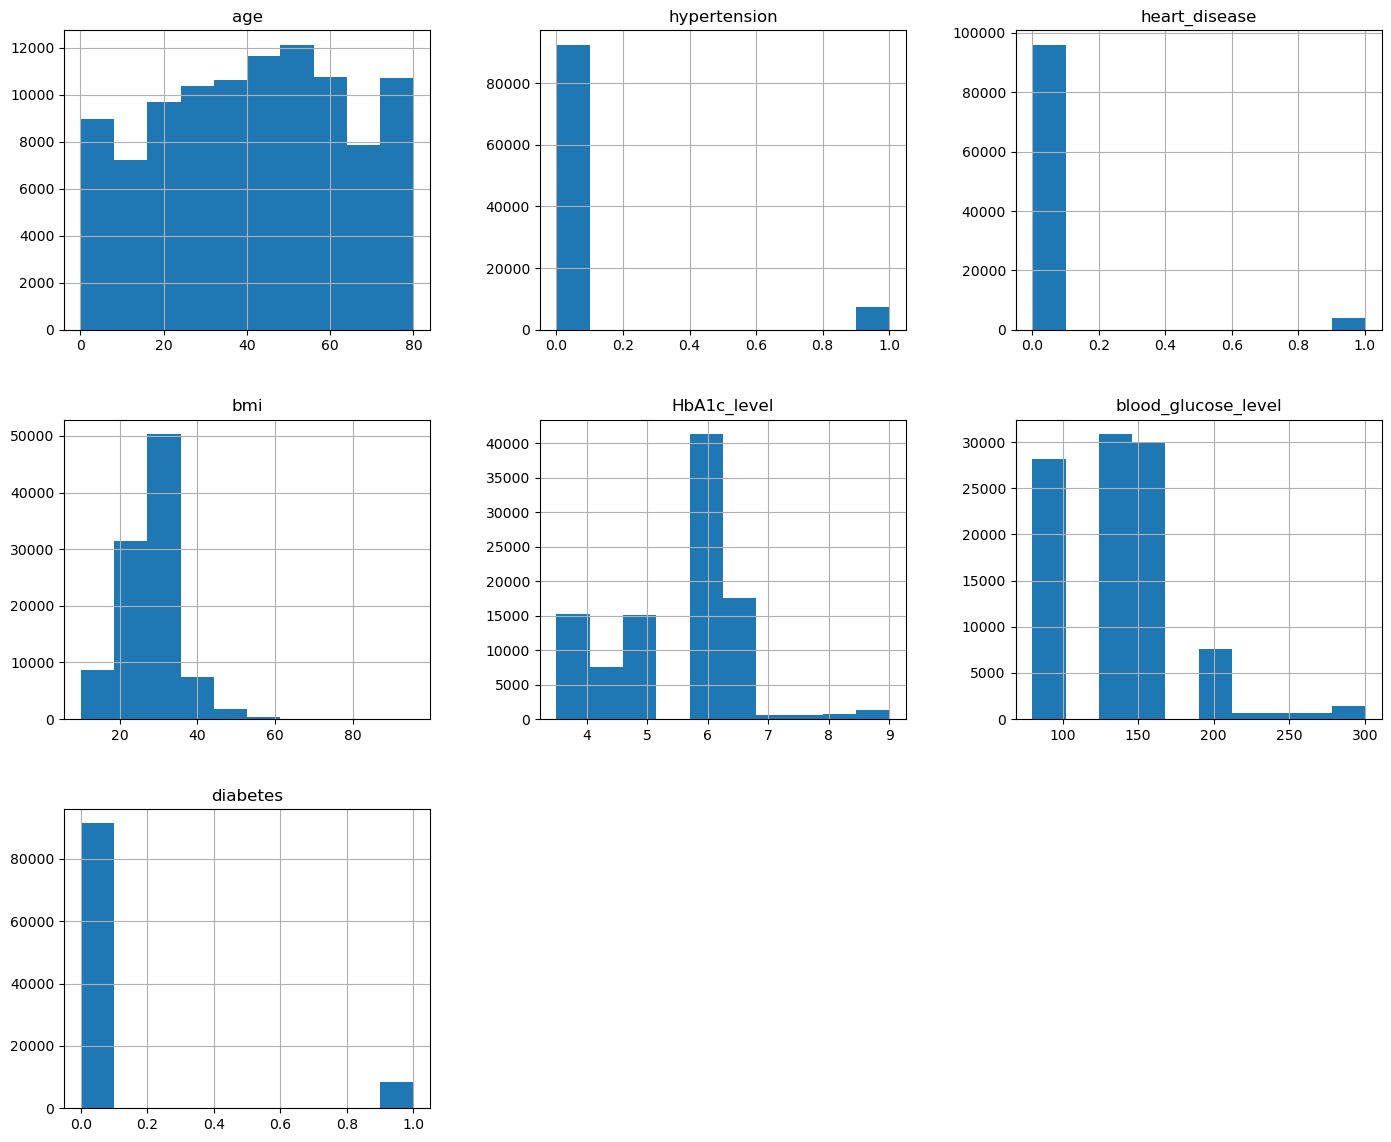

In [9]:
df_diabetics.hist(figsize=(17,14))
plt.show

In [10]:
df_diabetics_copy['blood_glucose_level'].fillna(df_diabetics_copy['blood_glucose_level'].mean(), inplace = True)
df_diabetics_copy['hypertension'].fillna(df_diabetics_copy['hypertension'].mean(), inplace = True)
df_diabetics_copy['HbA1c_level'].fillna(df_diabetics_copy['HbA1c_level'].median(), inplace = True)
df_diabetics_copy['heart_disease'].fillna(df_diabetics_copy['heart_disease'].median(), inplace = True)
df_diabetics_copy['bmi'].fillna(df_diabetics_copy['bmi'].median(), inplace = True)

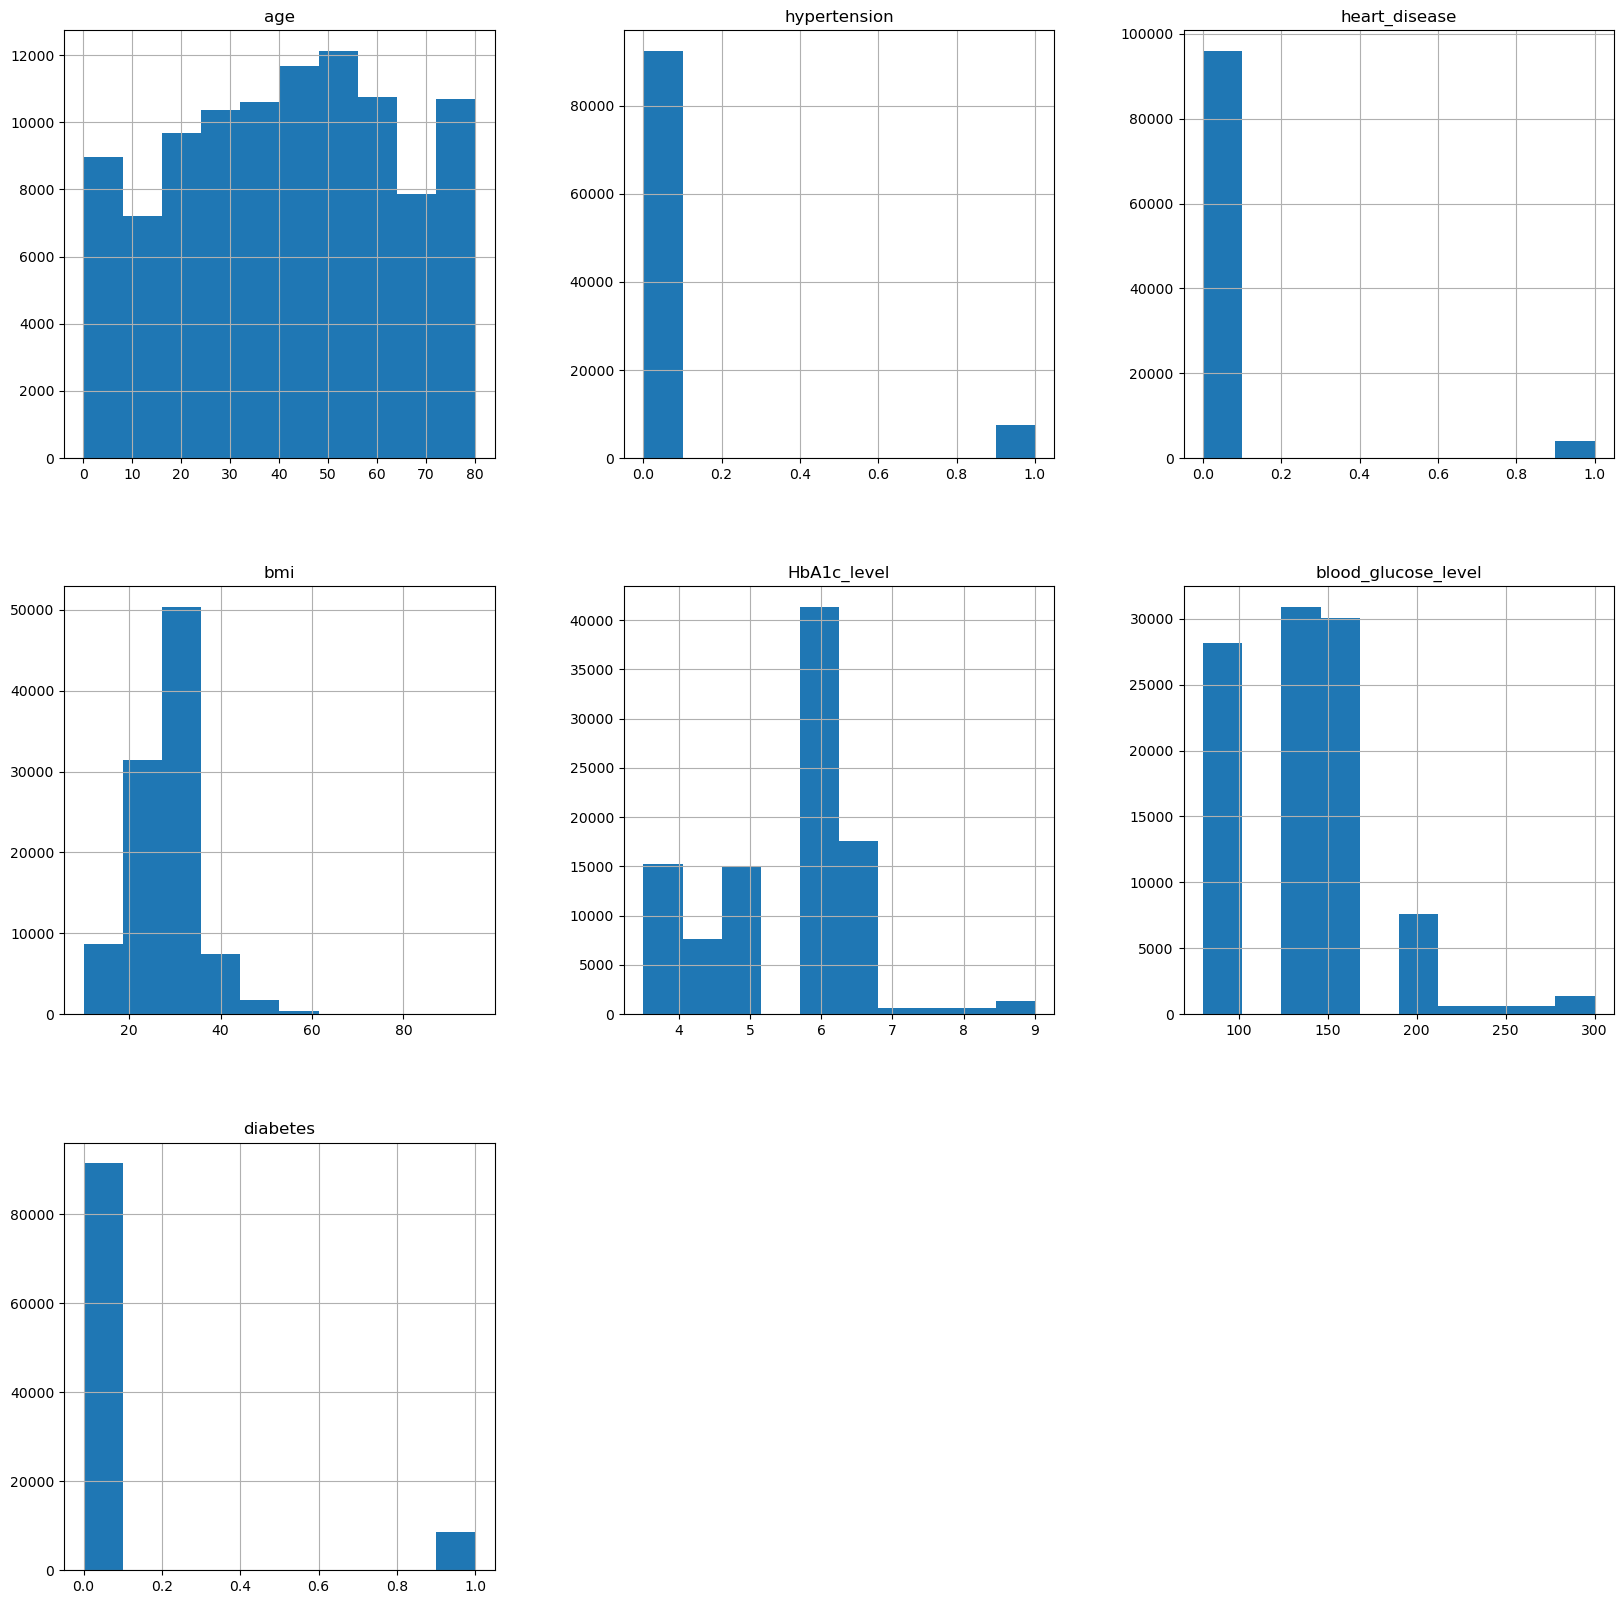

In [11]:
p= df_diabetics_copy.hist(figsize=(20,20))

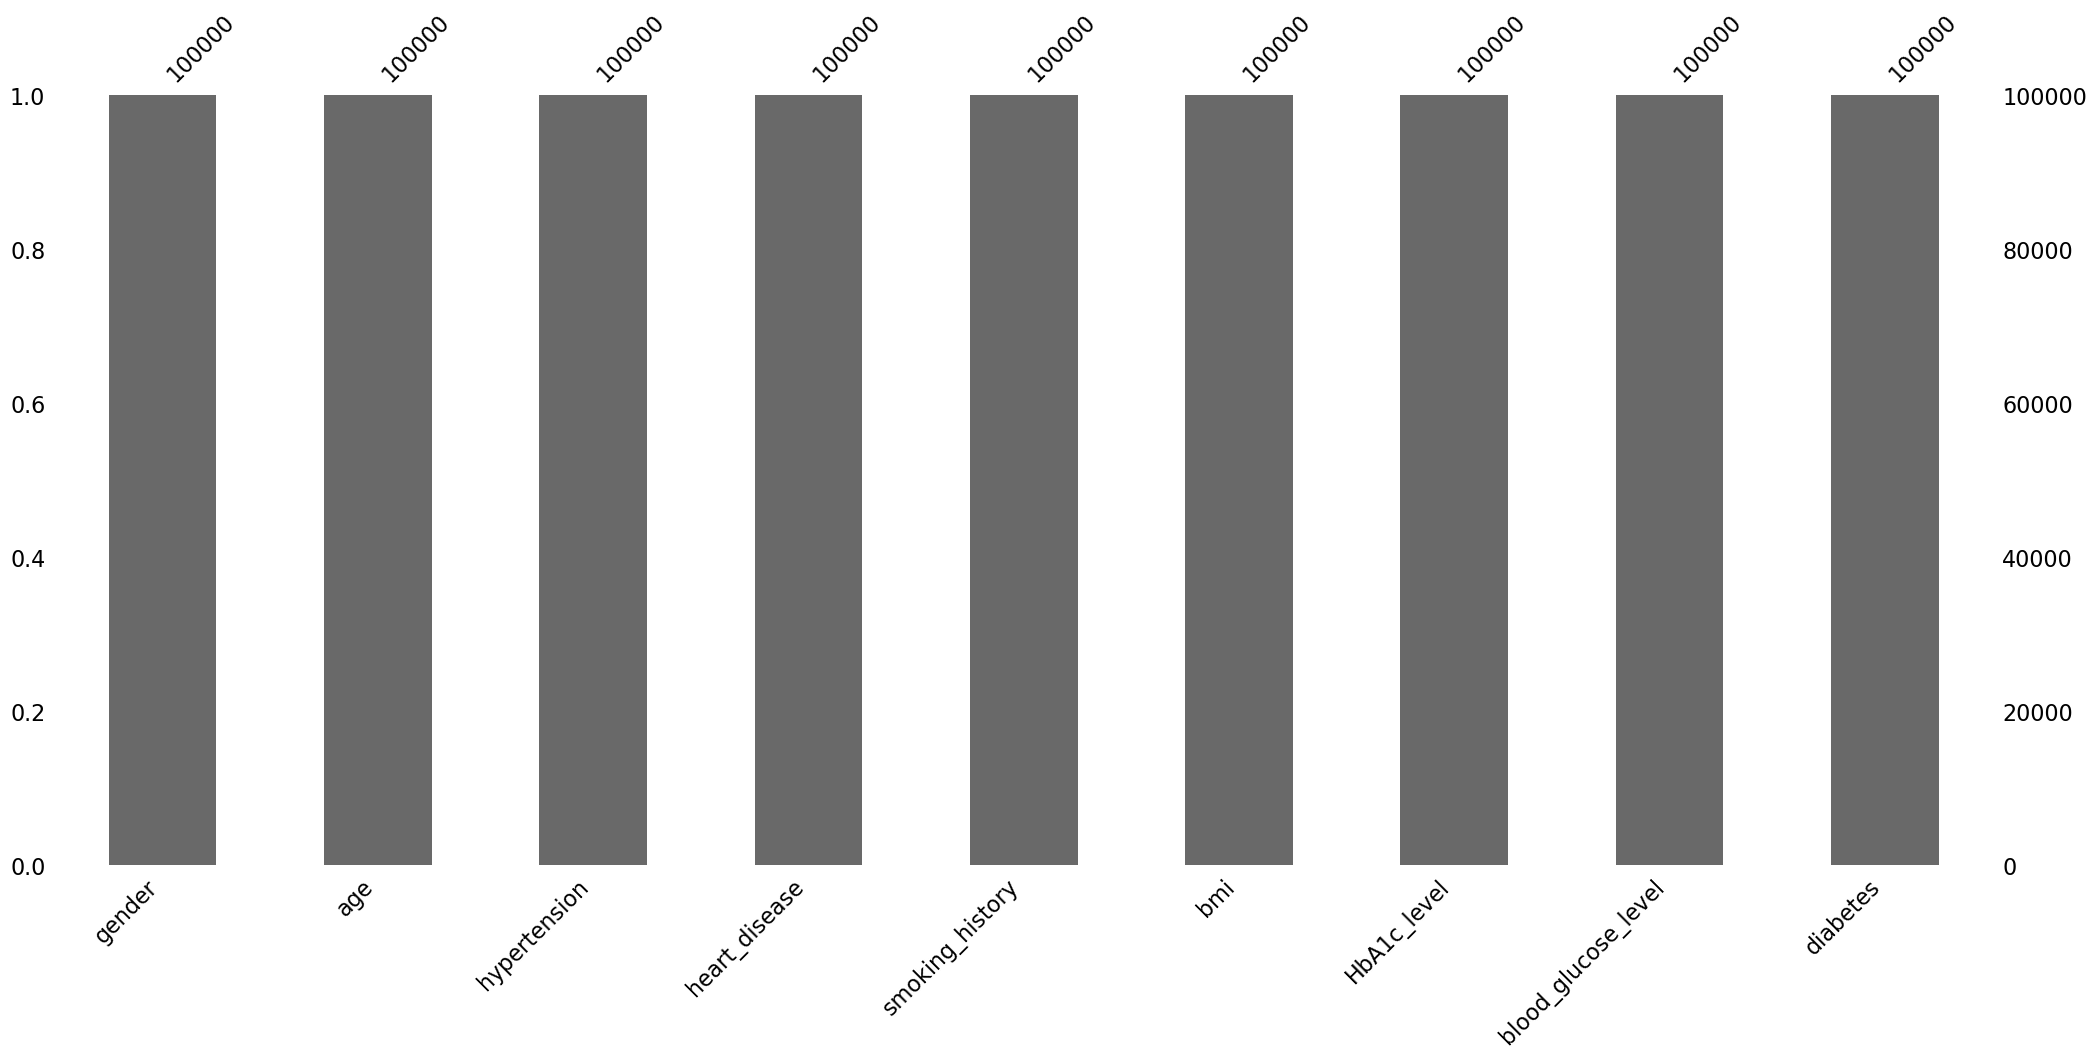

In [12]:
p = msno.bar(df_diabetics)

diabetes
0    91500
1     8500
Name: count, dtype: int64


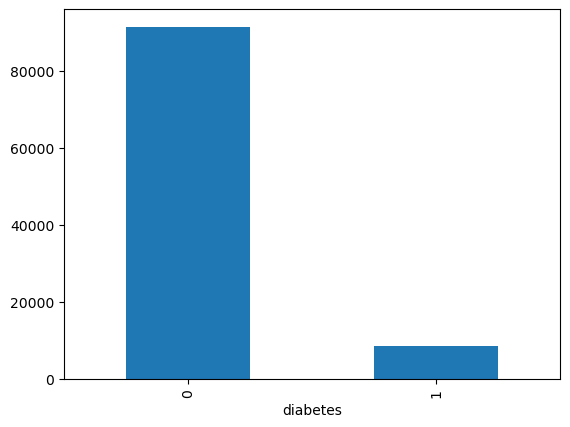

In [13]:
color_wheel={1: "#0392cf", 2: "#7bc043"}
colors=df_diabetics["diabetes"].map(lambda x:color_wheel.get(x+1))
print(df_diabetics.diabetes.value_counts())
p = df_diabetics.diabetes.value_counts().plot(kind="bar")

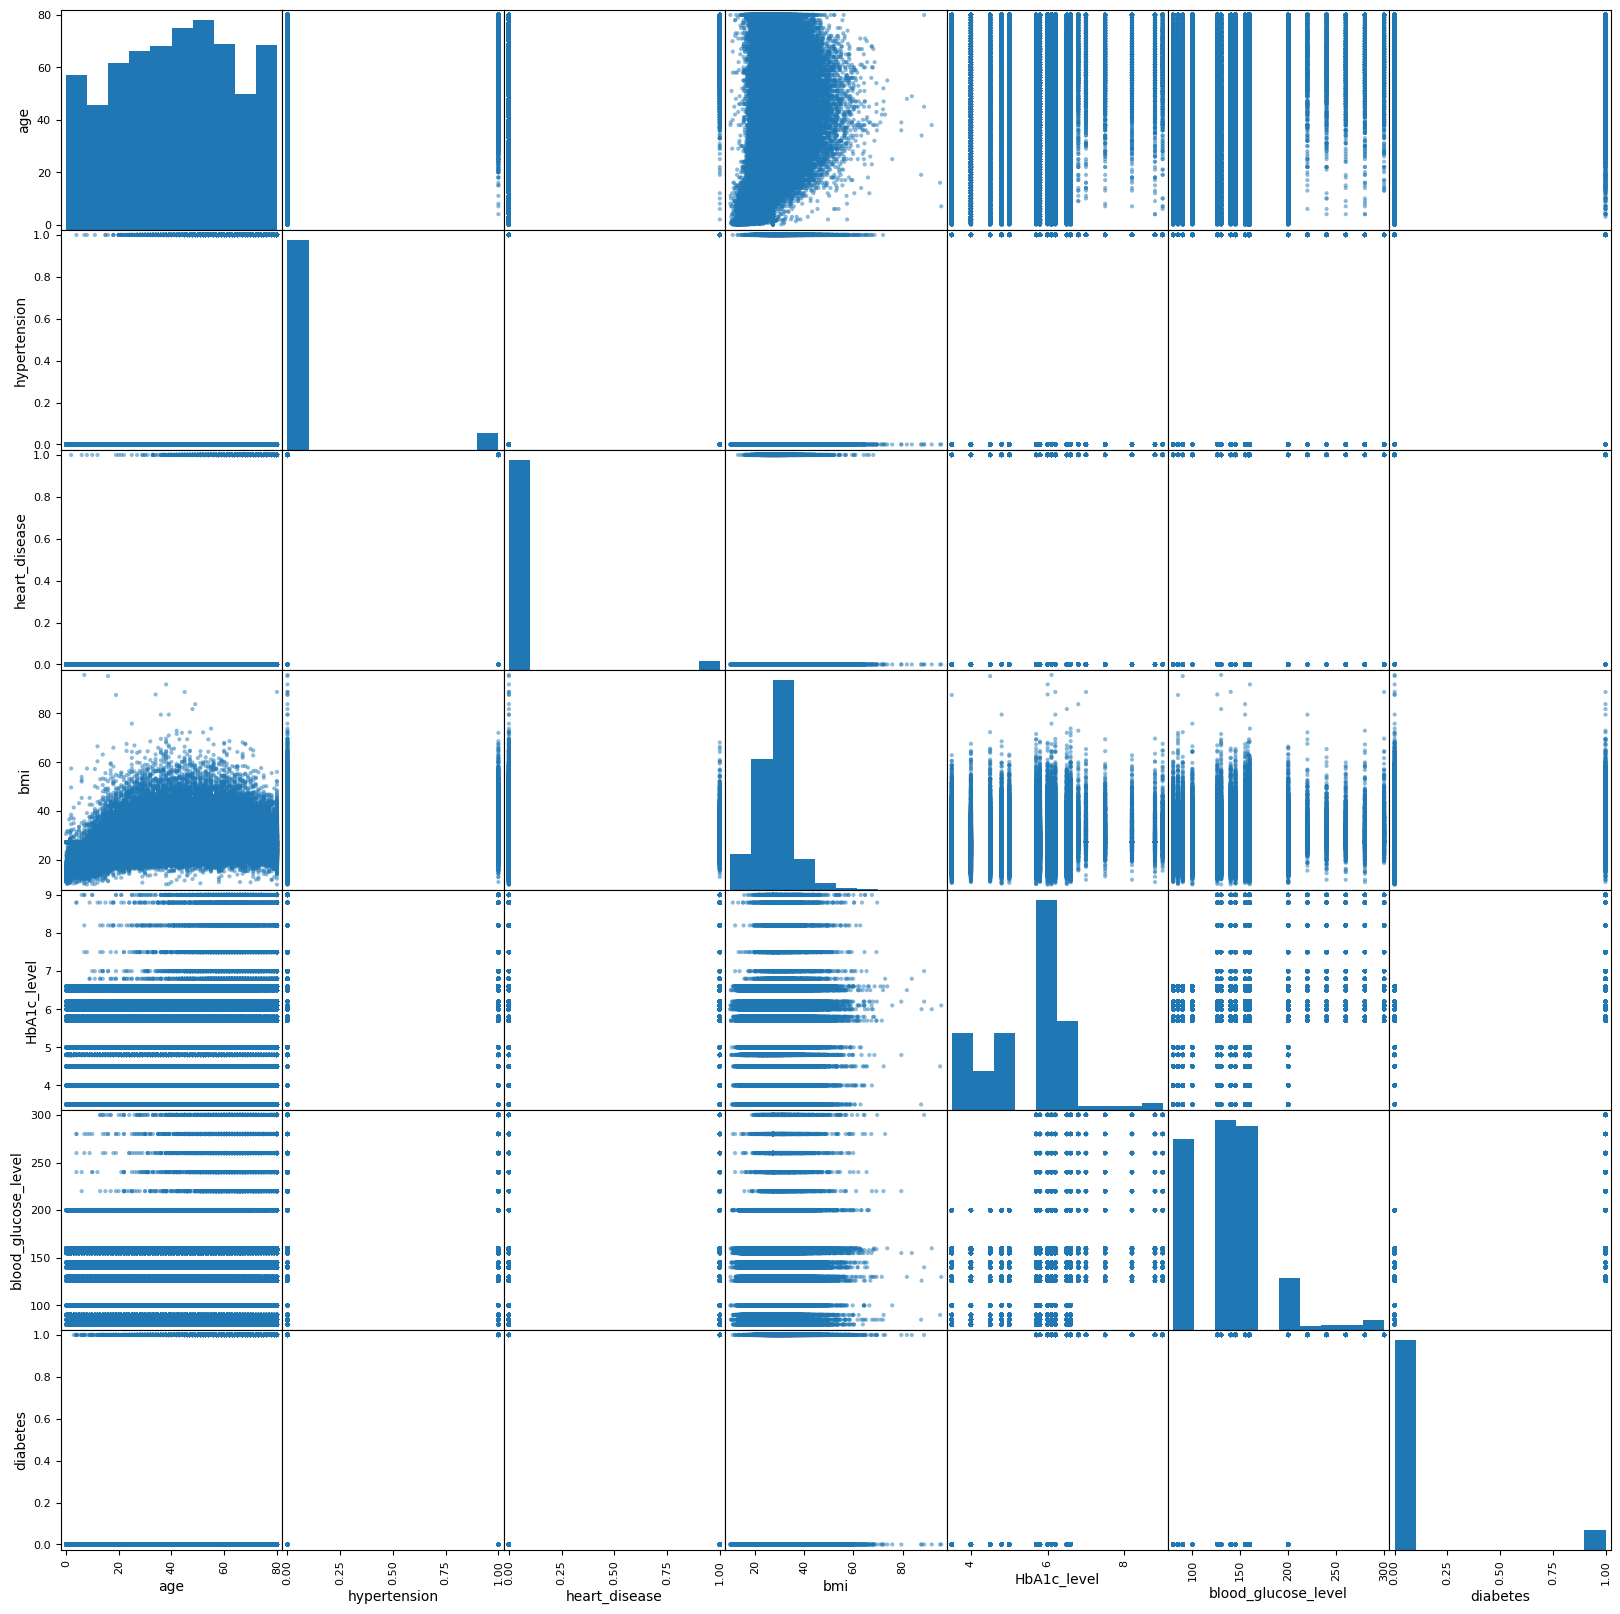

In [14]:
p = scatter_matrix(df_diabetics, figsize=(20,20))

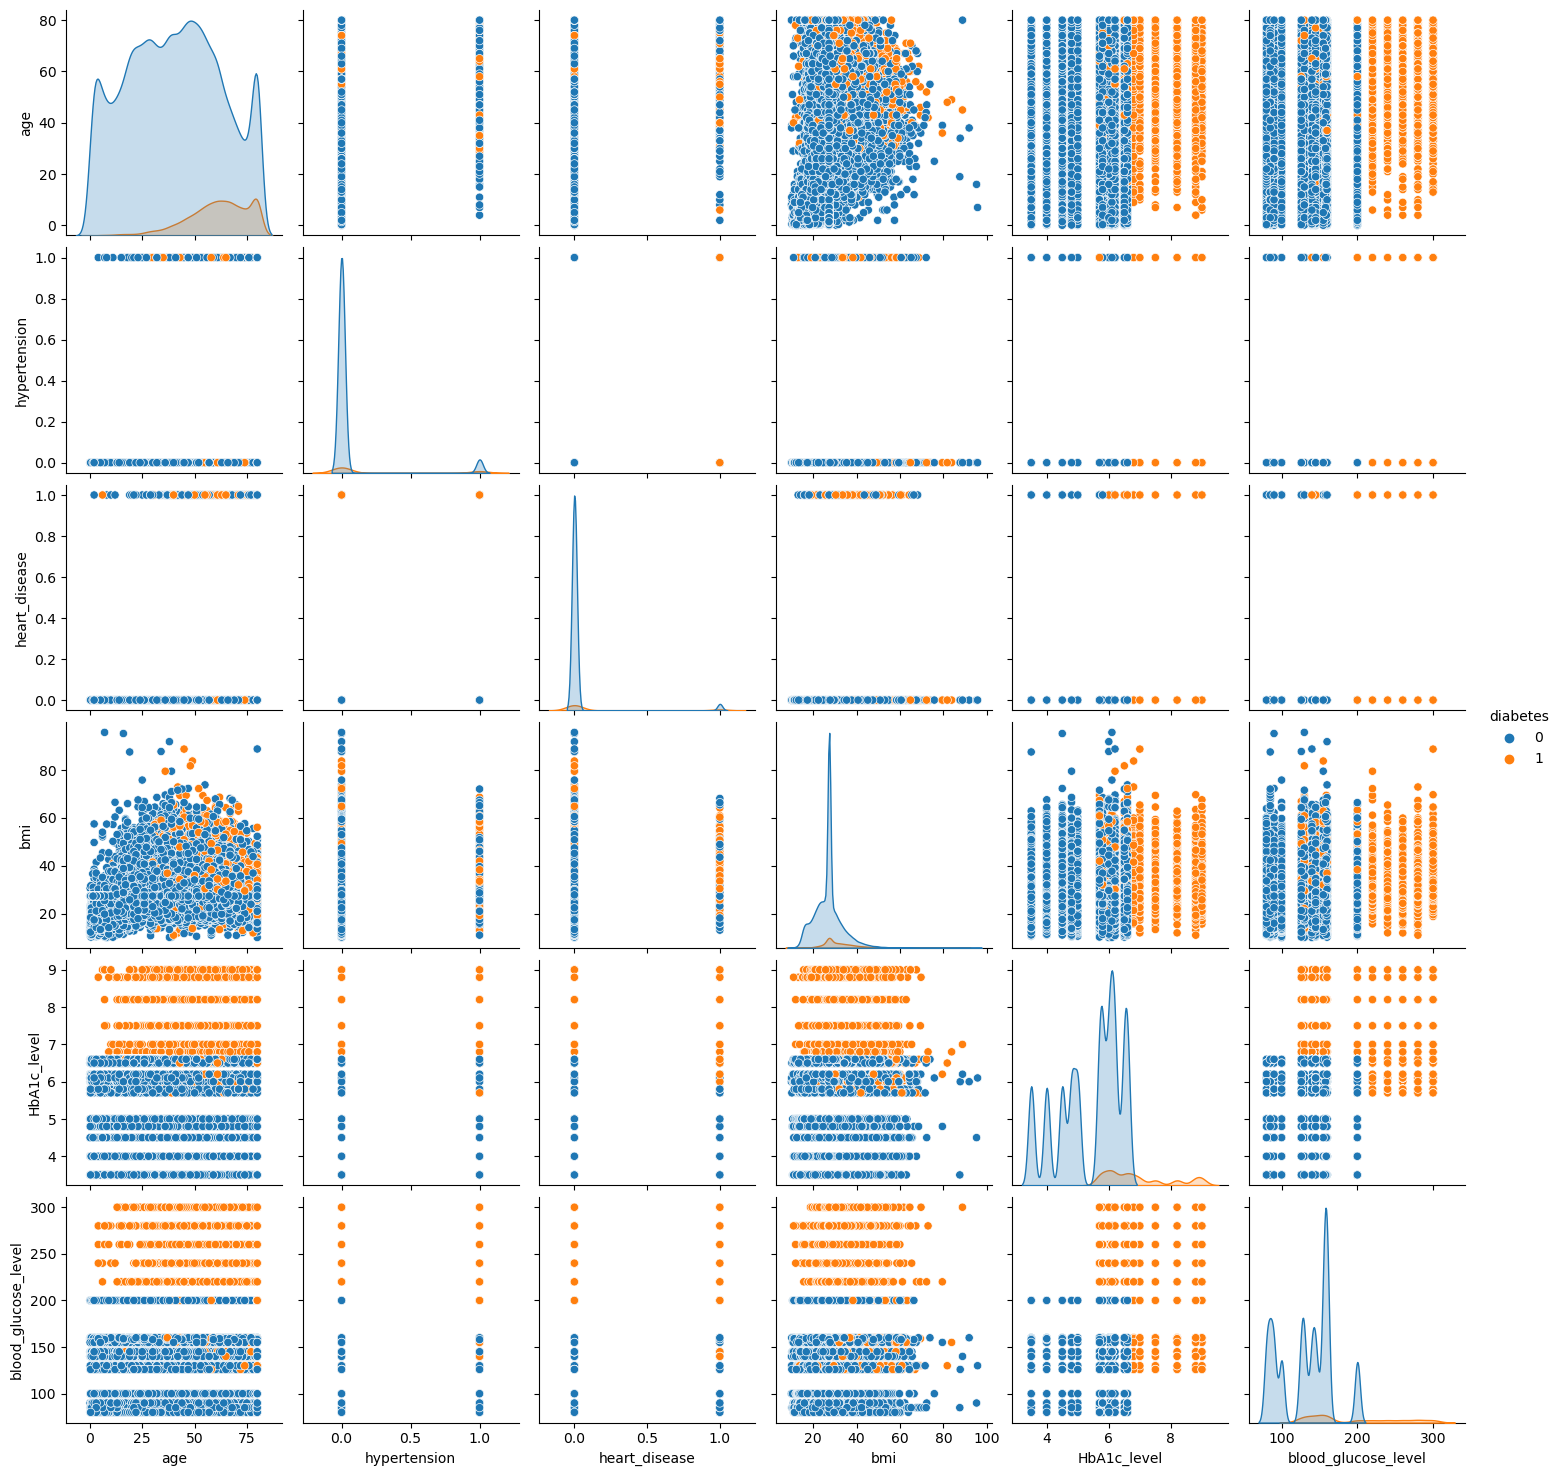

In [15]:
sns.pairplot(df_diabetics_copy, hue='diabetes')
plt.show()

<Axes: ylabel='count'>

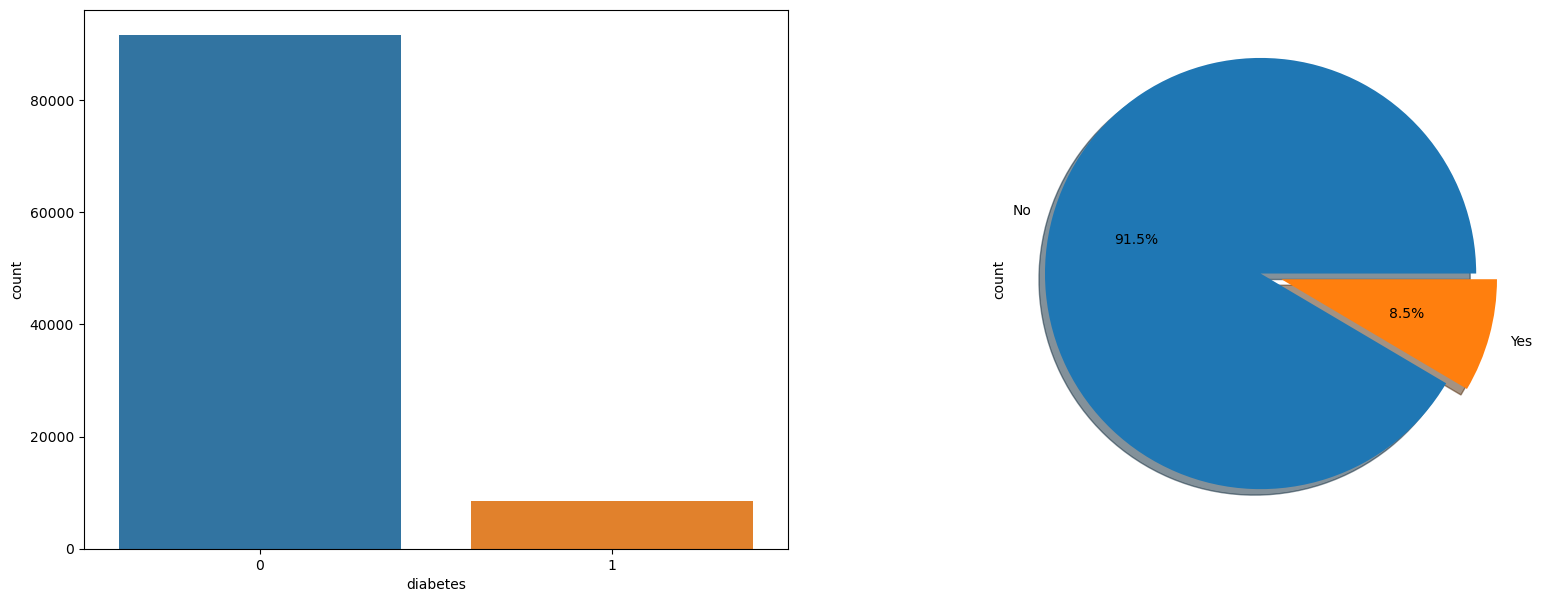

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(data = df_diabetics, x = "diabetes", ax = ax[0])
df_diabetics["diabetes"].value_counts().plot.pie(explode=[0.1,0], autopct = "%1.1f%%", 
labels= ["No", "Yes"], shadow= True, ax = ax[1])

In [20]:
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

#Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
#Decision Tree visualisation
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

#Analyse Result
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Explainable AI
import lime
from lime import lime_tabular

#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping



In [53]:
data=pd.read_csv('diabetes-2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
data.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
missing_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in missing_columns:
    data[column].replace(0, np.NaN, inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [69]:
for column in missing_columns:
    median=data[column].median()
    data[column].fillna(median,inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [71]:
y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

In [72]:
data.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [73]:
import random as rn
np.random.seed(10)
rn.seed(10)
tf.compat.v1.set_random_seed(10)
session_conf = tf.compat.v1.ConfigProto( intra_op_parallelism_threads=1,
                                          inter_op_parallelism_threads=1 )

In [74]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=10)
X_res, y_res = ros.fit_resample(X, y)


In [75]:
Counter(y_res)

Counter({1: 500, 0: 500})

In [76]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [77]:
X_mat = X_res.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_res, test_size=0.3, stratify=y_res, random_state=10)

In [78]:
rs=10
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [79]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8133333333333334


In [80]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       150
           1       0.78      0.87      0.82       150

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



In [83]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': range(5, 25, 5)},
             return_train_score=True)

In [84]:
print(cv_1.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 15}


In [85]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8385714285714285
Test accuracy: 0.7533333333333333


In [86]:
# grab feature importances from the model
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

Glucose : 0.4694138690088672
BMI : 0.24092997980695113
Age : 0.12287304277967197
BloodPressure : 0.08283588881637777
DiabetesPedigreeFunction : 0.049591014235148695
Pregnancies : 0.02135644169606756
Insulin : 0.01299976365691569
SkinThickness : 0.0


In [88]:
patient_index=1

patient_features=X_test[patient_index]
actual_result=y_test.tolist()[patient_index]
predicted_result=cv_1.best_estimator_.predict([X_test[patient_index]])

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_index, "Diabetes" if predicted_result else "No Diabetes", "Diabetes" if actual_result else "No Diabetes"))

print('\nPatient features: ' )
for x,y in enumerate(feature_names):
    print(feature_names[x],patient_features[x])

Patient id: 1 	 Predicted: No Diabetes 	 True Diagnosis: No Diabetes


Patient features: 
Pregnancies 0.0
Glucose 124.0
BloodPressure 56.0
SkinThickness 13.0
Insulin 105.0
BMI 21.8
DiabetesPedigreeFunction 0.452
Age 21.0


In [89]:
patient_index=90

patient_features=X_test[patient_index]
actual_result=y_test.tolist()[patient_index]
predicted_result=cv_1.best_estimator_.predict([X_test[patient_index]])

print("Patient id: %d \t Predicted: %s \t True Diagnosis: %s\n" 
      %(patient_index, "Diabetes" if predicted_result else "No Diabetes", "Diabetes" if actual_result else "No Diabetes"))

print('\nPatient features: ' )
for x,y in enumerate(feature_names):
    print(feature_names[x],patient_features[x])

Patient id: 90 	 Predicted: No Diabetes 	 True Diagnosis: Diabetes


Patient features: 
Pregnancies 5.0
Glucose 115.0
BloodPressure 76.0
SkinThickness 29.0
Insulin 125.0
BMI 31.2
DiabetesPedigreeFunction 0.343
Age 44.0


In [90]:
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = cv_1.best_estimator_.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.8133333333333332
ROC index on test for DT_optimal: 0.8391555555555555


FileNotFoundError: [Errno 2] No such file or directory: 'img/dt_roc.png'

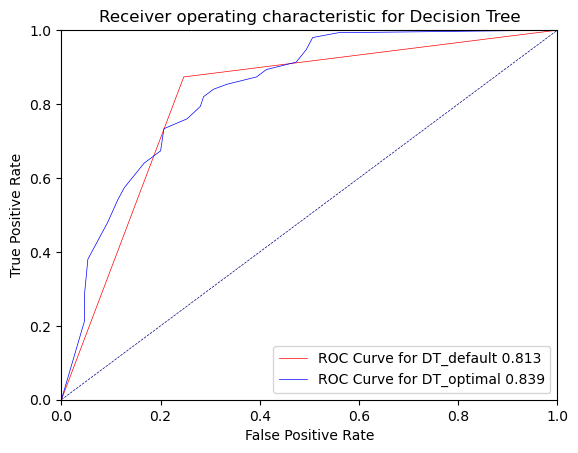

In [91]:
#Plot ROC-AUC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.savefig('img/dt_roc')
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

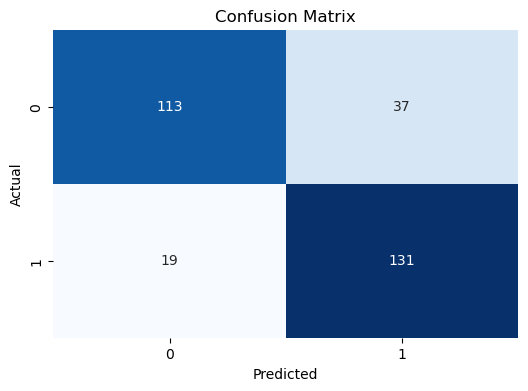

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model' is your trained classifier and 'X_test', 'y_test' are your test data
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [96]:
!pip install --upgrade scikit-learn


In [98]:
!pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.7 MB/s eta 0:00:00a 0:00:01


FileNotFoundError: [Errno 2] No such file or directory: 'img/dt_confusionmatrix.png'

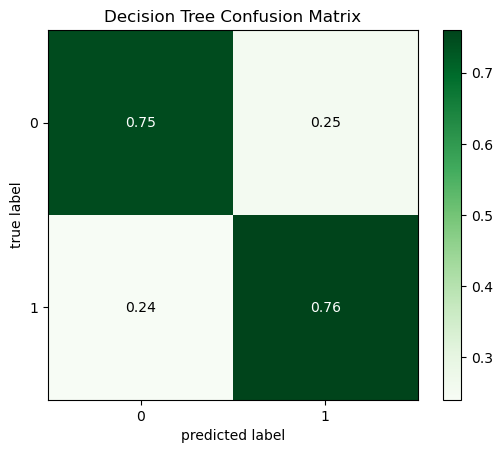

In [100]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'cv_1.best_estimator_' is your trained classifier and 'X_test', 'y_test' are your test data
y_pred = cv_1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                cmap="Greens",
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True)
plt.title('Decision Tree Confusion Matrix')
plt.savefig('img/dt_confusionmatrix')
plt.show()



In [101]:
scaler = MinMaxScaler()

print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))
    
X_train = scaler.fit_transform(X_train)
print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))
    
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 0.0, max 15.0, mean 4.05 and std dev 3.39
Variable #1: min 44.0, max 199.0, mean 127.67 and std dev 31.40
Variable #2: min 24.0, max 122.0, mean 73.15 and std dev 12.65
Variable #3: min 7.0, max 99.0, mean 29.38 and std dev 8.62
Variable #4: min 14.0, max 846.0, mean 147.92 and std dev 89.81
After scaling
-------------
Variable #0: min 0.0, max 1.0, mean 0.27 and std dev 0.23
Variable #1: min 0.0, max 1.0, mean 0.54 and std dev 0.20
Variable #2: min 0.0, max 0.9999999999999998, mean 0.50 and std dev 0.13
Variable #3: min 0.0, max 0.9999999999999999, mean 0.24 and std dev 0.09
Variable #4: min 0.0, max 1.0, mean 0.16 and std dev 0.11


In [103]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

# Convert y_train and y_test to numpy arrays before indexing
y_train = enc.fit_transform(y_train.to_numpy().reshape(-1, 1)).toarray()
y_test = enc.fit_transform(y_test.to_numpy().reshape(-1, 1)).toarray()


In [104]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

In [105]:
def create_model(input_dim, output_dim, nodes, hidden_layers=1, loss_func='categorical_crossentropy', optim='nadam', metrics=['accuracy'], name='model'):
    
    model = Sequential(name=name)

    # adding a sequence of layers according to the fucntion's input params
    model.add( Dense(nodes, input_dim=input_dim, activation='relu'))  # input layer
    for i in range(hidden_layers):                                    # hidden layers
      model.add(Dense(nodes, activation='relu'))  
    model.add(Dense(output_dim, activation='softmax'))                # output layer

    # Compile model
    if( optim == "nadam" ):
      optim = keras.optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999)
  
    model.compile(loss=loss_func, 
                  optimizer=optim, 
                  metrics=metrics)
    return model

In [106]:
def serialize_model_history(  model_hist, model_name, path ):
  file = open(path + model_name + "_hist.csv", "w")
  w = csv.writer( file )
  
  for key, val in model_hist.history.items():
    w.writerow([key, val])
  file.close()
  print("Model history saved to disk") 

# LOAD_MODEL_HISTORY ------------------------------------------
def load_model_history( model_name, path):

  model_hist_loaded = {}
  values = []

  # load dictionary
  r = open( path + model_name + "_hist.csv", "r").read()
  for line in r.split("\n"):
    if(len(line) == 0):
      continue
  
    metric = line.split(",\"[")[0]                                    # extract metrics
    values_str = line.split(",\"[")[1].replace("]\"","").split(", ")  # extract validation values
    values = [float(val_str) for val_str in values_str]
    model_hist_loaded.update( {metric : values} )
  return model_hist_loaded

In [107]:
features=list(X.columns)
n_features=len(features)
n_samples = X.shape[0]
n_classes = len(data['Outcome'].unique())
print('''There are %i number of features, %i training instances with %i target classes.'''%(n_features,n_samples,n_classes))

There are 8 number of features, 768 training instances with 2 target classes.


In [108]:
MAX_NODES = 9
MAX_HLAYERS = 4
DEBUG = False
models = []
metrics = ['accuracy']

# Define different models with different number of hidden layers and different number of neurons
for neuron in range(2, MAX_NODES+1,3):
  print("-----------------------------------")
  for hidden_layer in range(1, MAX_HLAYERS+1):
    model_name = "model_h" + str(hidden_layer) + "_N"+str(neuron)
    model = create_model(n_features, n_classes, neuron, hidden_layer, name=model_name, metrics = metrics)
    
    print("Generating model: " + model_name)
    models.append( model )

# plot general information for each model
if( DEBUG ):  
  for model in models:
      model.summary()

-----------------------------------
Generating model: model_h1_N2
Generating model: model_h2_N2
Generating model: model_h3_N2
Generating model: model_h4_N2
-----------------------------------
Generating model: model_h1_N5


Generating model: model_h2_N5
Generating model: model_h3_N5
Generating model: model_h4_N5
-----------------------------------
Generating model: model_h1_N8
Generating model: model_h2_N8
Generating model: model_h3_N8
Generating model: model_h4_N8


In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
data = pd.read_csv('diabetic_data.csv')

In [125]:
data.head


<bound method NDFrame.head of         encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discha

In [126]:
data.shape

(101766, 50)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Text(0, 0.5, 'Count')

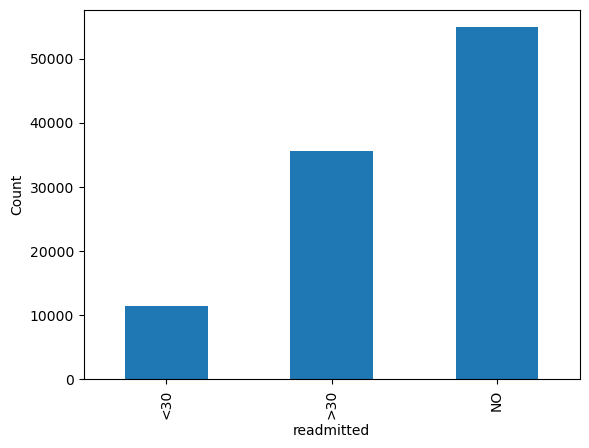

In [128]:
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [129]:
data['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in data['readmitted']])
data_origin = data

Text(0, 0.5, 'Count')

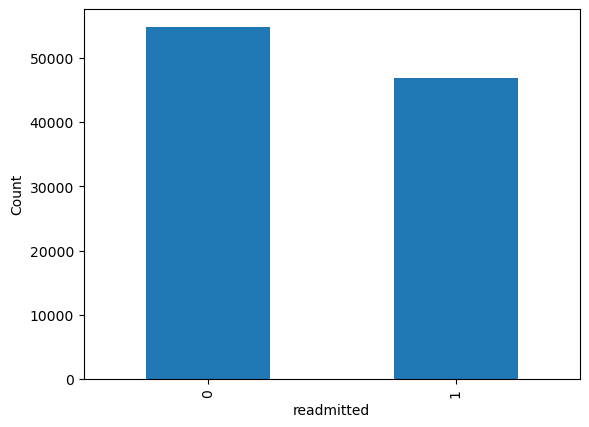

In [130]:
data.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [131]:
data.drop(['encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)

In [132]:
data[data['weight'] == '?'].shape[0] * 1.0 / data.shape[0]

0.9685847925633315

In [133]:
data[data['medical_specialty'] == '?'].shape[0] * 1.0 / data.shape[0]

0.49082208203132677

In [134]:
data.drop(['weight', 'medical_specialty'], axis=1, inplace=True)

In [135]:
data = data[data['race'] != '?']
data = data[data['diag_1'] != '?']
data = data[data['diag_2'] != '?']
data = data[data['diag_3'] != '?']
data = data[data['gender'] != 'Unknown/Invalid']

Text(0, 0.5, 'Count')

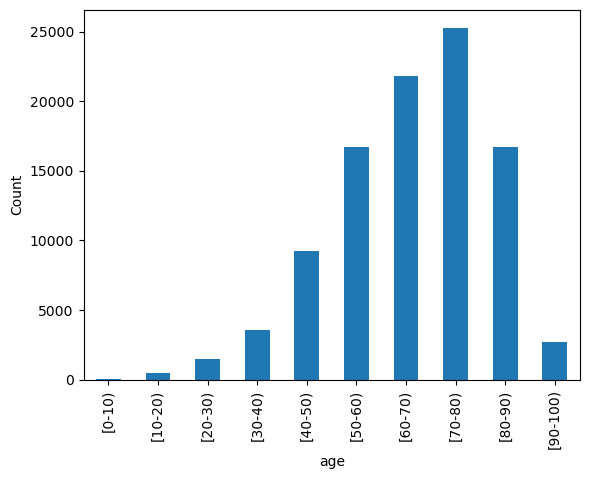

In [136]:
data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

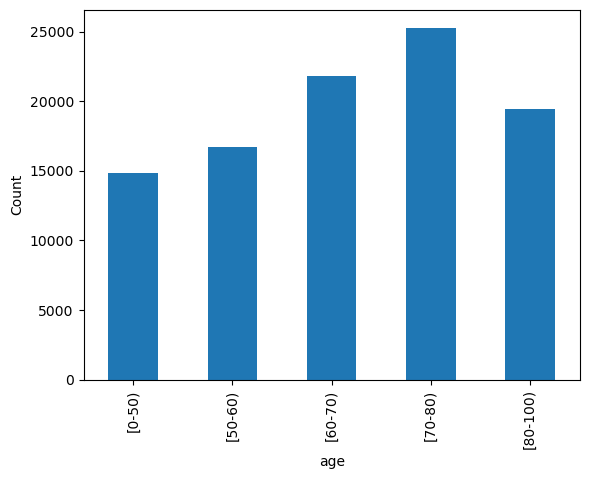

In [137]:
data['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in data['age']], index=data.index)
data['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in data['age']], index=data.index)

data.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')


In [138]:
data['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in data['discharge_disposition_id']], index=data.index)

In [139]:
# original 'admission_source_id' contains 25 levels
# reduce 'admission_source_id' into 3 categories
data['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in data['admission_source_id']], index=data.index)

In [140]:
# original 'admission_type_id' contains 8 levels
# reduce 'admission_type_id' into 2 categories
data['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in data['admission_type_id']], index=data.index)

Text(0, 0.5, 'Count')

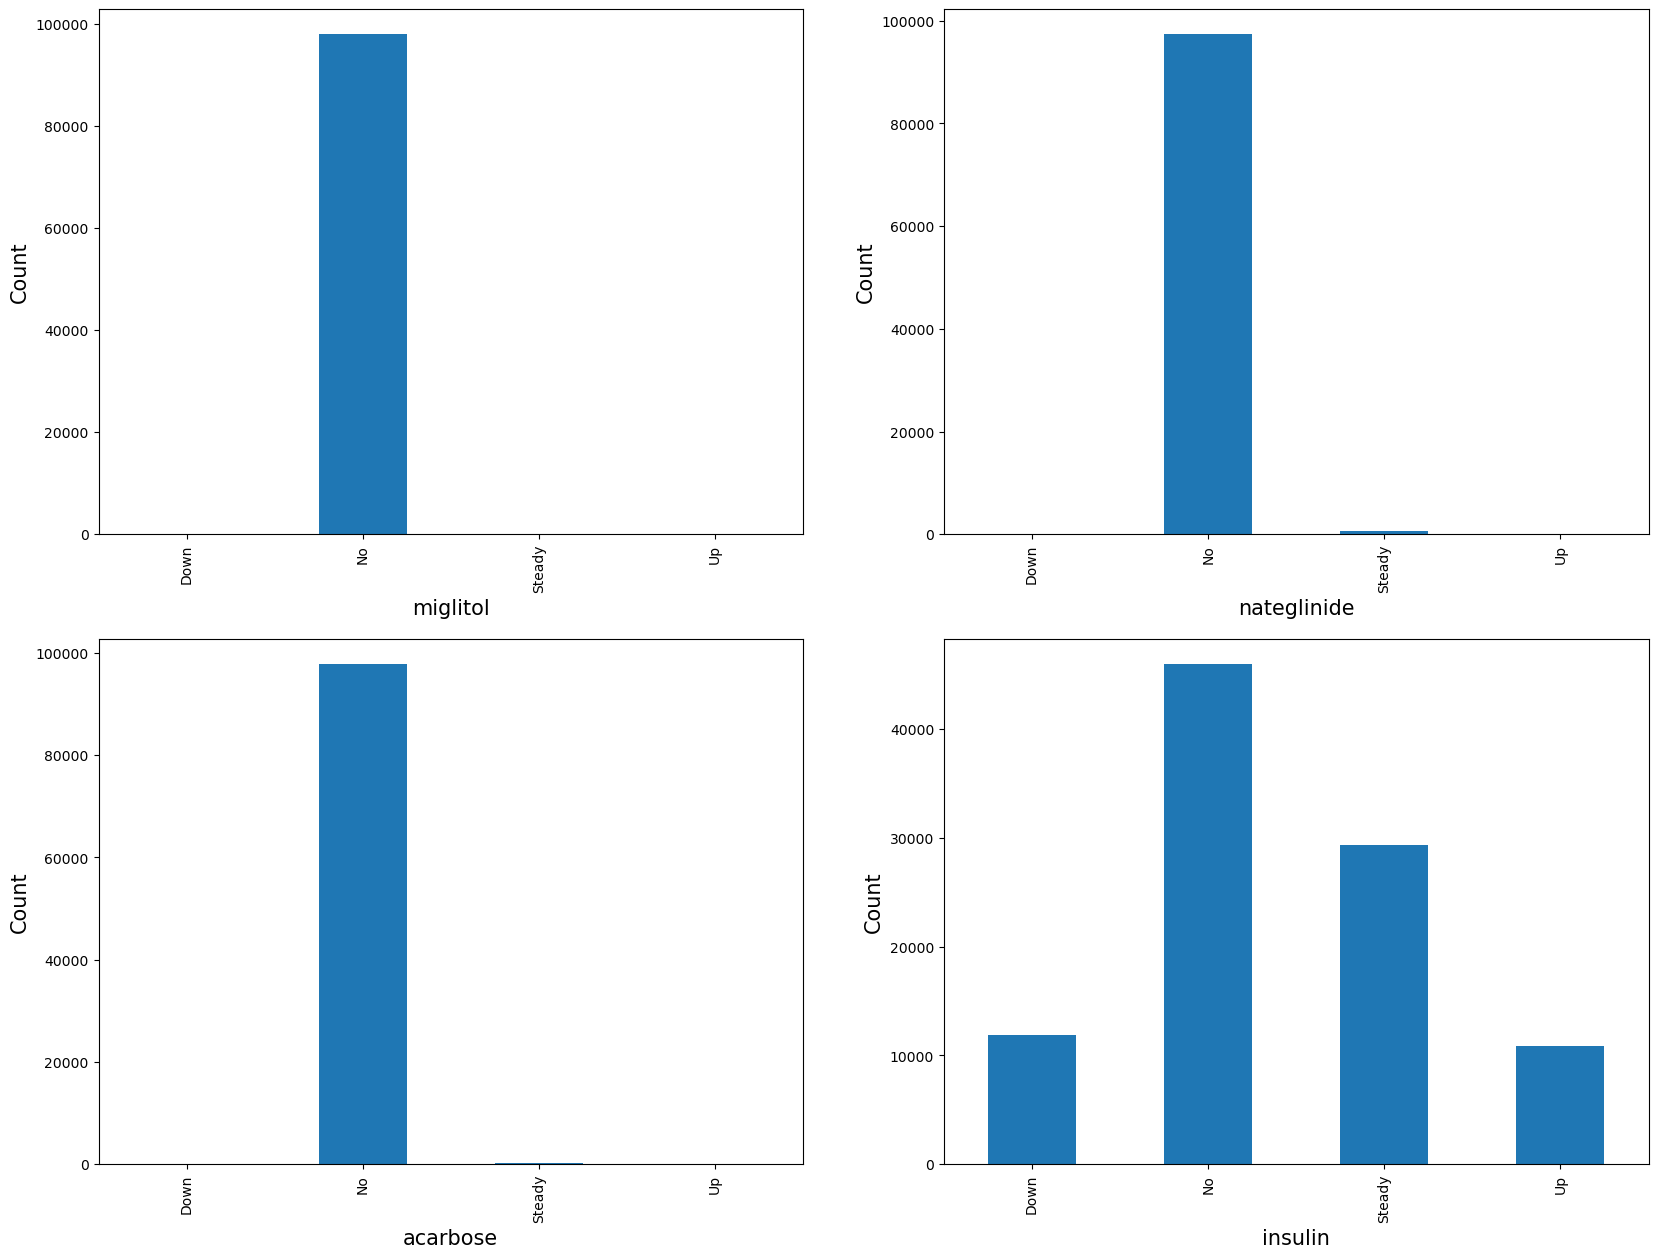

In [141]:
# compare diabetes medications 'miglitol', 'nateglinide' and 'acarbose' with 'insulin', as an example
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax1 = data.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig.add_subplot(222)
ax2 = data.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig.add_subplot(223)
ax3 = data.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig.add_subplot(224)
ax4 = data.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [142]:
# keep only 'insulin' and remove the other 22 diabetes medications
data.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

In [143]:
data['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in data['diag_1']], index=data.index)
data.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

In [144]:
data.shape

(98052, 21)

In [145]:
list(data.columns.values)

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [146]:
df_age = pd.get_dummies(data['age'])
df_race = pd.get_dummies(data['race'])
df_gender = pd.get_dummies(data['gender'])
df_max_glu_serum = pd.get_dummies(data['max_glu_serum'])
df_A1Cresult = pd.get_dummies(data['A1Cresult'])
df_insulin = pd.get_dummies(data['insulin'])
df_change = pd.get_dummies(data['change'])
df_diabetesMed = pd.get_dummies(data['diabetesMed'])
df_discharge_disposition_id = pd.get_dummies(data['discharge_disposition_id'])
df_admission_source_id = pd.get_dummies(data['admission_source_id'])
df_admission_type_id = pd.get_dummies(data['admission_type_id'])

data = pd.concat([data, df_age, df_race, df_gender, df_max_glu_serum, df_A1Cresult, 
                  df_insulin, df_change, df_diabetesMed, df_discharge_disposition_id, 
                  df_admission_source_id, df_admission_type_id], axis=1)
data.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)


In [147]:
data['number_outpatient'] = data['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
data['number_emergency'] = data['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
data['number_inpatient'] = data['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [148]:
feature_scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data[feature_scale_cols])
data_scaler = scaler.transform(data[feature_scale_cols])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=feature_scale_cols, index=data.index)
data.drop(feature_scale_cols, axis=1, inplace=True)
data = pd.concat([data, data_scaler_df], axis=1)

In [149]:
X = data.drop(['readmitted'], axis=1)
y = data['readmitted']

In [151]:
from sklearn.model_selection import train_test_split


In [152]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.25)


Top 6 features are: 
num_lab_procedures
num_medications
time_in_hospital
num_procedures
number_diagnoses
number_inpatient


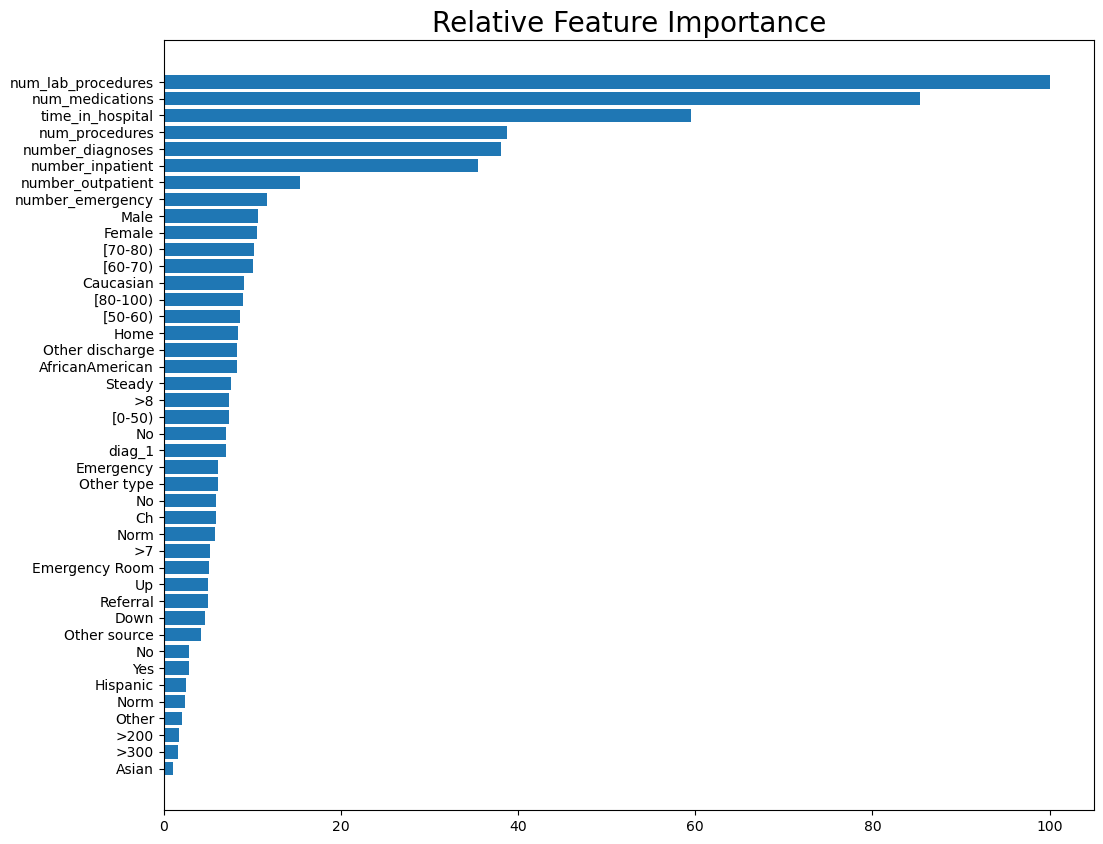

In [155]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print('Top 6 features are: ')
for feature in feature_names_sort[::-1][:6]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()

In [175]:
X_cv_top6 = X_cv[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient']]

In [173]:
for i in range(20, 22):
    zero_count = group[0].get(i, 0)
    one_count = group[1].get(i, 0)

    total_count = zero_count + one_count
    if total_count > 0:
        zero_pct_value = zero_count * 100.0 / total_count
        one_pct_value = 100 - zero_pct_value
        zero_pct.append(zero_pct_value)
        one_pct.append(one_pct_value)
    else:
        zero_pct.append(0)
        one_pct.append(0)

In [174]:
from sklearn.model_selection import cross_val_score


In [169]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

0.6081263011576625

In [170]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
NB_score = cross_val_score(clf2, X_cv, y_cv, cv=10, scoring='accuracy').mean()
NB_score

0.5996681563670144

In [171]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv, y_cv, cv=10, scoring='accuracy').mean()
LR_score

0.6185153105666643

Text(0, 0.5, 'Cross-Validated Accuracy')

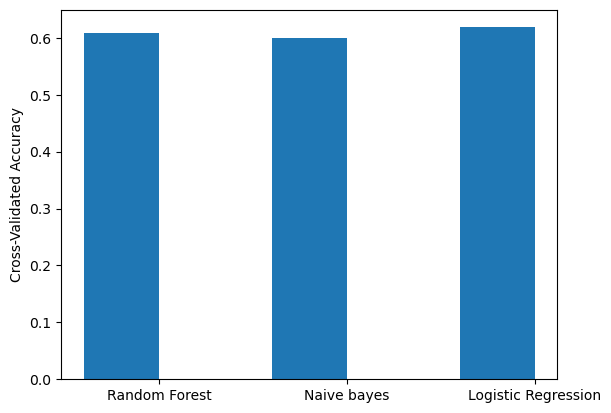

In [172]:
# plot and compare the scores
# LR outperforms the other two a little bit
x_axis = np.arange(3)
y_axis = [RF_score, NB_score, LR_score]
plt.bar(x_axis, y_axis, width=0.4)
plt.xticks(x_axis + 0.4/2., ('Random Forest', 'Naive bayes', 'Logistic Regression'))
plt.ylabel('Cross-Validated Accuracy')

In [176]:
LR_score_top = cross_val_score(clf3, X_cv_top6, y_cv, cv=10, scoring='accuracy').mean()
LR_score_top

0.6120424724935081

In [ ]:
C_range = np.arange(0.1, 3.1, 0.2)
param_grid = dict(C = C_range)

In [179]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_cv, y_cv)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])},
             scoring='accuracy')

Text(0.5, 0, 'Value of C for Logistic Regression')

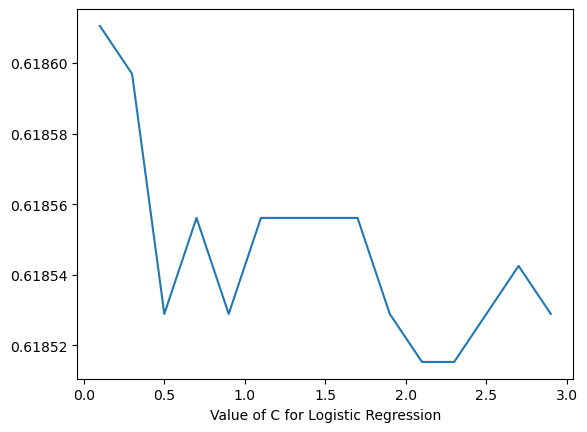

In [181]:
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(C_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression')


In [183]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.6186104931612002
{'C': 0.1}
LogisticRegression(C=0.1)


In [184]:
y_test.value_counts()

readmitted
0    13101
1    11412
Name: count, dtype: int64

In [185]:
max(y_test.mean(), 1 - y_test.mean())

0.5344511075755721

In [186]:
logreg = LogisticRegression(C=grid.best_params_['C'])
logreg.fit(X_cv, y_cv)

LogisticRegression(C=0.1)

In [188]:
from sklearn import metrics
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.6219149022967405


In [190]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print (confusion)

[[10236  2865]
 [ 6403  5009]]


In [192]:
print (metrics.recall_score(y_test, y_pred_class))

0.43892393971258326


In [194]:
print (TN / float(TN + FP))

0.7813144034806503


In [195]:
print (FP / float(TN + FP))

0.21868559651934966
